In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

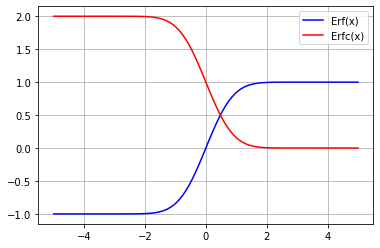

In [2]:
x=np.linspace(-5,5,100)
yerf=sp.erf(x)
yerfc=sp.erfc(x)
plt.plot(x,yerf,'b',label='Erf(x)')
plt.plot(x,yerfc,'r',label='Erfc(x)')
plt.grid('on')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


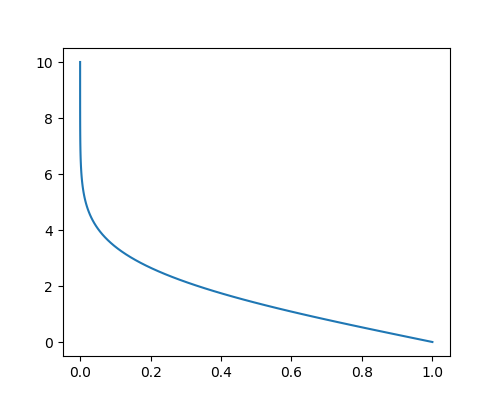

interactive(children=(FloatSlider(value=0.01, description='t', max=30.0, min=0.01, step=0.01), Output()), _dom…

In [4]:
%matplotlib notebook
from ipywidgets import *


x = np.linspace(0, 10,100)
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(1, 1, 1)

nu=1
t=1
line, = ax.plot(sp.erfc(x/np.sqrt(nu*t)),x)

def update(t = 1.0):
    line.set_xdata(sp.erfc(x/np.sqrt(nu*t)))
    fig.canvas.draw_idle()

interact(update,t=widgets.FloatSlider(min=0.01, max=30, step=0.01, value=0.01));

<IPython.core.display.Javascript object>


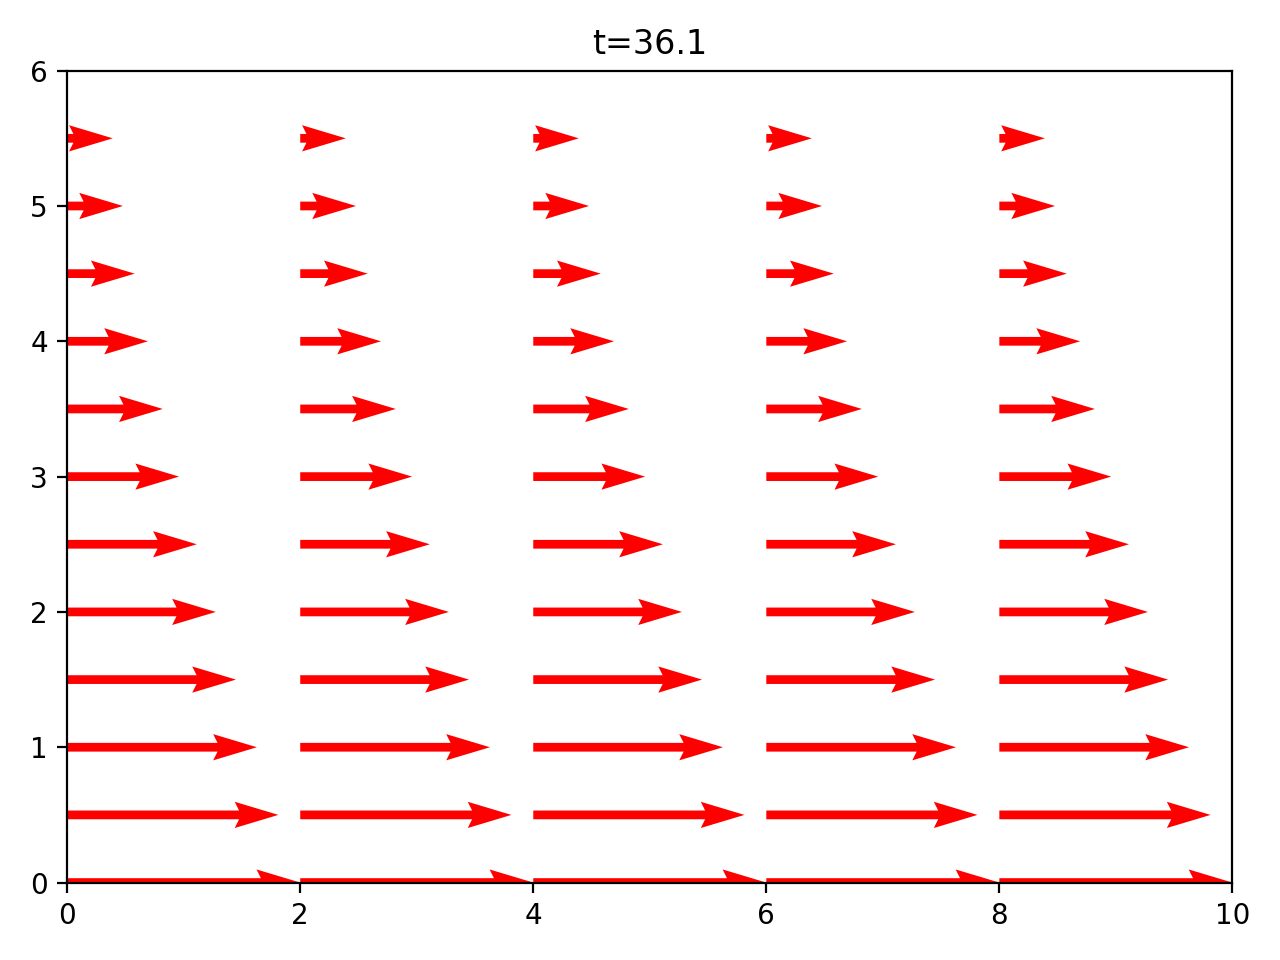

In [49]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib notebook
nu=1
t=0.1
X, Y = np.mgrid[:10:2,:6:0.5]
U = sp.erfc(Y/np.sqrt(nu*t))
V = 0.*Y

fig, ax = plt.subplots(1,1)
Q = ax.quiver(X, Y, U, V, color='r',scale=5)

ax.set_title(t)
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)

def update_quiver(num, Q, Y,ax, t):
    # updates the horizontal velocity at each frame
    tnow=t + num*0.1
    U = sp.erfc(Y/np.sqrt(nu*tnow))
    V = 0.*Y
    Q.set_UVC(U,V)
    ax.set_title('t=%3.1f'%tnow)

    return Q,

anim = animation.FuncAnimation(fig, update_quiver, fargs=(Q, Y,ax, t),frames=np.arange(0.0, 1000, 5),
                               interval=50, blit=False, repeat=True)
fig.tight_layout()
#anim.save('flow.gif')
plt.show()